In [1]:
from tqdm import tqdm
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from torchvision import transforms
from torchvision.utils import save_image
from model import vannillaVariationalAutoEncoder
import matplotlib.pyplot as plt

In [2]:
DEVICE = torch.device("cuda")
INPUT_DIM = 784
H_DIM = 200
Z_DIM = 20

NUM_EPOCHS = 30
BATCH_SIZE = 256
LR_RATE = 3e-4

In [3]:
dataset = datasets.MNIST(root = "dataset/", train = True, transform=transforms.ToTensor(), download=True)
test_dataset  = datasets.MNIST(root="dataset", transform=transforms.ToTensor(), train=False, download=True)

train_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=8,shuffle=False)



model = vannillaVariationalAutoEncoder(input_dim= INPUT_DIM,
                                       h_dim= H_DIM,
                                       z_dim= Z_DIM).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr=LR_RATE)
loss_fn = nn.MSELoss(reduction="sum")

In [19]:
def train():
    for epoch in range(NUM_EPOCHS):
        loop = tqdm(enumerate(train_loader))
        for i, (x, _) in loop:
            x = x.to(DEVICE).view(x.shape[0], INPUT_DIM)
            img, mu, sigma = model(x)

            recLoss = loss_fn(img, x)
            KLLoss = - 0.5 * torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))

            loss = recLoss + KLLoss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loop.set_postfix(loss=loss.item())
    torch.save(model,"checkpoint.pt")


In [20]:
train()

235it [00:09, 24.02it/s, loss=2.76e+3]
235it [00:10, 23.45it/s, loss=2.88e+3]
235it [00:09, 23.65it/s, loss=2.81e+3]
235it [00:09, 23.76it/s, loss=2.81e+3]
235it [00:09, 24.46it/s, loss=3e+3]   
235it [00:09, 24.04it/s, loss=2.87e+3]
235it [00:09, 24.10it/s, loss=2.88e+3]
235it [00:09, 24.07it/s, loss=2.89e+3]
235it [00:09, 24.68it/s, loss=2.83e+3]
235it [00:09, 25.22it/s, loss=2.98e+3]
235it [00:10, 23.39it/s, loss=2.87e+3]
235it [00:09, 24.20it/s, loss=2.85e+3]
235it [00:09, 24.36it/s, loss=2.92e+3]
235it [00:09, 23.91it/s, loss=2.81e+3]
235it [00:09, 23.80it/s, loss=3.07e+3]
235it [00:09, 24.90it/s, loss=2.88e+3]
235it [00:09, 24.71it/s, loss=2.97e+3]
235it [00:09, 23.90it/s, loss=2.95e+3]
235it [00:09, 24.10it/s, loss=2.88e+3]
235it [00:09, 23.57it/s, loss=2.97e+3]
235it [00:09, 24.43it/s, loss=2.92e+3]
235it [00:09, 24.75it/s, loss=2.92e+3]
235it [00:09, 24.92it/s, loss=2.87e+3]
235it [00:09, 24.19it/s, loss=2.95e+3]
235it [00:09, 23.61it/s, loss=2.9e+3] 
235it [00:09, 24.50it/s, 

In [5]:
def show_image(x, idx):
    x = x.view(8, 28, 28)

    fig = plt.figure()
    plt.imshow(x[idx].cpu().numpy())


  0%|                                                                 | 0/1250 [00:00<?, ?it/s]


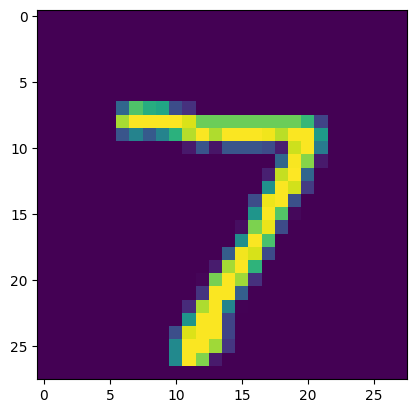

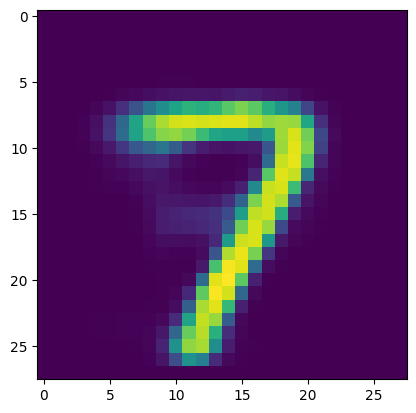

In [45]:
model = torch.load("checkpoint.pt")
with torch.no_grad():
    for batch_id, (x, _) in enumerate(tqdm(test_loader)):
        x = x.view(8, INPUT_DIM)
        x = x.to(DEVICE)
        x_hat, _, _ = model(x)
        break
    show_image(x, idx = 0)
    show_image(x_hat, idx = 0)


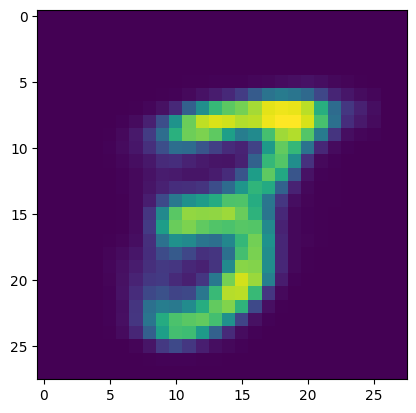

In [37]:
with torch.no_grad():
    z = torch.randn(8,Z_DIM).to(DEVICE)
    pic = model.decoder(z)
    show_image(pic, idx=0)